# Proyek Analisis Data: Nama dataset
- Nama: Awang Mulya Nugrawan
- Email: awangmulyanugrawan@gmail.com
- Id Dicoding: Awang Nugrawan
- Streamlid deploy : https://app-cgxv3ujb259.streamlit.app/

## Menentukan Pertanyaan Bisnis

- Pada jam-jam apa dalam sehari yang memiliki tingkat peminjaman sepeda yang tinggi pada setiap musim?
- Bagaimana perbedaan dalam pola rental sepeda antara tahun 2011 dan 2012?
- Bagaimana pengaruh cuaca terhadap jumlah total rental sepeda pada setiap bulannya?
- Pada hari apa terakhir kali transaksi paling baru  terjadi?
- Pada hari apa transaksi paling sering terjadi?
- Hari apa dalam seminggu yang memiliki total nilai transaksi tertinggi?



## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour= pd.read_csv(r'Bike-sharing-dataset\hour.csv')
hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [3]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom dteday. kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [4]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
hour.duplicated().sum()

0

In [6]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom dteday. kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

### Cleaning Data

In [7]:
hour = hour.rename(columns={'weathersit':'weather',
                        'dteday': 'datetime',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'total_count'})

hour.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour.apply(lambda x: len(x.unique()))

instant        17379
datetime         731
season             4
year               2
month             12
hour              24
holiday            2
weekday            7
workingday         2
weather            4
temp              50
atemp             65
humidity          89
windspeed         30
casual           322
registered       776
total_count      869
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore HOUR

In [9]:
hour.describe(include='all')

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [10]:
column = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

for col in column:
    hour[col] = hour[col].astype('category')

hour['datetime']=pd.to_datetime(hour.datetime)

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   datetime     17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  int64         
 4   month        17379 non-null  category      
 5   hour         17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [12]:
# converting season values: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hour.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# converting month values: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# converting weathersit values: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hour.weather.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# converting weekday values: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# converting year values: 0:2011, 1:2012
hour.year.replace((0,1), (2011,2012), inplace=True)

In [13]:
hour.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour['year'].value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

In [15]:
hour['season'].value_counts()

Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: season, dtype: int64

In [16]:
hour['month'].value_counts()

May    1488
Jul    1488
Dec    1483
Aug    1475
Mar    1473
Oct    1451
Jun    1440
Apr    1437
Sep    1437
Nov    1437
Jan    1429
Feb    1341
Name: month, dtype: int64

In [17]:
hour['weather'].value_counts()

Clear             11413
Misty              4544
Light_rainsnow     1419
Heavy_rainsnow        3
Name: weather, dtype: int64

In [18]:
hour['weekday'].value_counts()

Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Pada jam-jam apa dalam sehari yang memiliki tingkat peminjaman sepeda yang tinggi pada setiap musim?

[Text(0.5, 1.0, 'Hourly Bike Sharing Count by Season')]

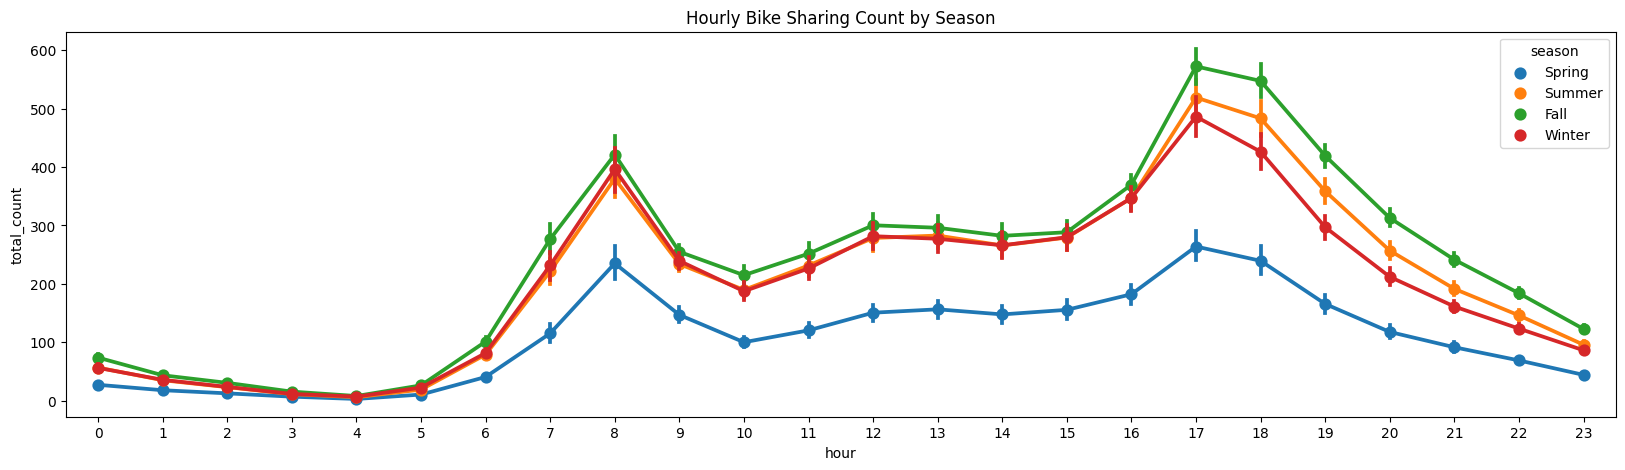

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour, x='hour', y='total_count', hue='season', ax=ax)
ax.set(title='Hourly Bike Sharing Count by Season')

Berdasarkan grafik diatas dapat dilihat bahwa pada jam 17.00 - 18.00 Sore merupakan jam yang memiliki tingkat peminjaman tertinggi di musim gugur (FALL) dan Musim Panas (SUMMER) sedangkan pada jam 4.00 - 5.00 memilikit tingkat peminjaman terendah pada seluruh musim

### Pertanyaan 2:
Bagaimana perbedaan dalam pola rental sepeda antara tahun 2011 dan 2012?

Text(0.5, 1.0, 'Comparison of Bike Sharing Counts Between 2011 and 2012 by Month')

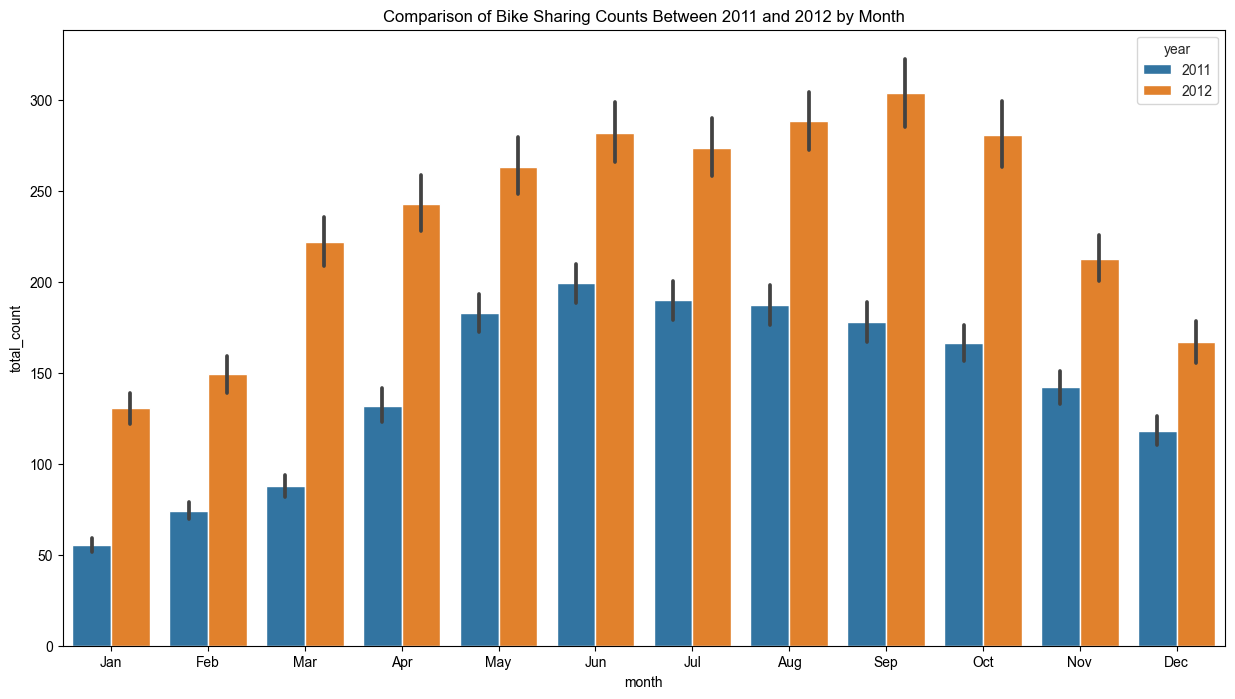

In [20]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month',y='total_count',data=hour[['month','total_count','year']],hue='year',ax=ax)
ax.set_title('Comparison of Bike Sharing Counts Between 2011 and 2012 by Month')


Dari grafik diatas dapat diketahui bahwa total peminjaman tahun 2012 mengalami peningkatan dari tahun 2011, terkhusus pada bulan agustus dan september tahun 2012

### Pertanyaan 3:
Bagaimana pengaruh cuaca terhadap jumlah total rental sepeda pada setiap bulannya?


Text(0.5, 1.0, 'Impact of Weather on Total Bike Rental Count by Month')

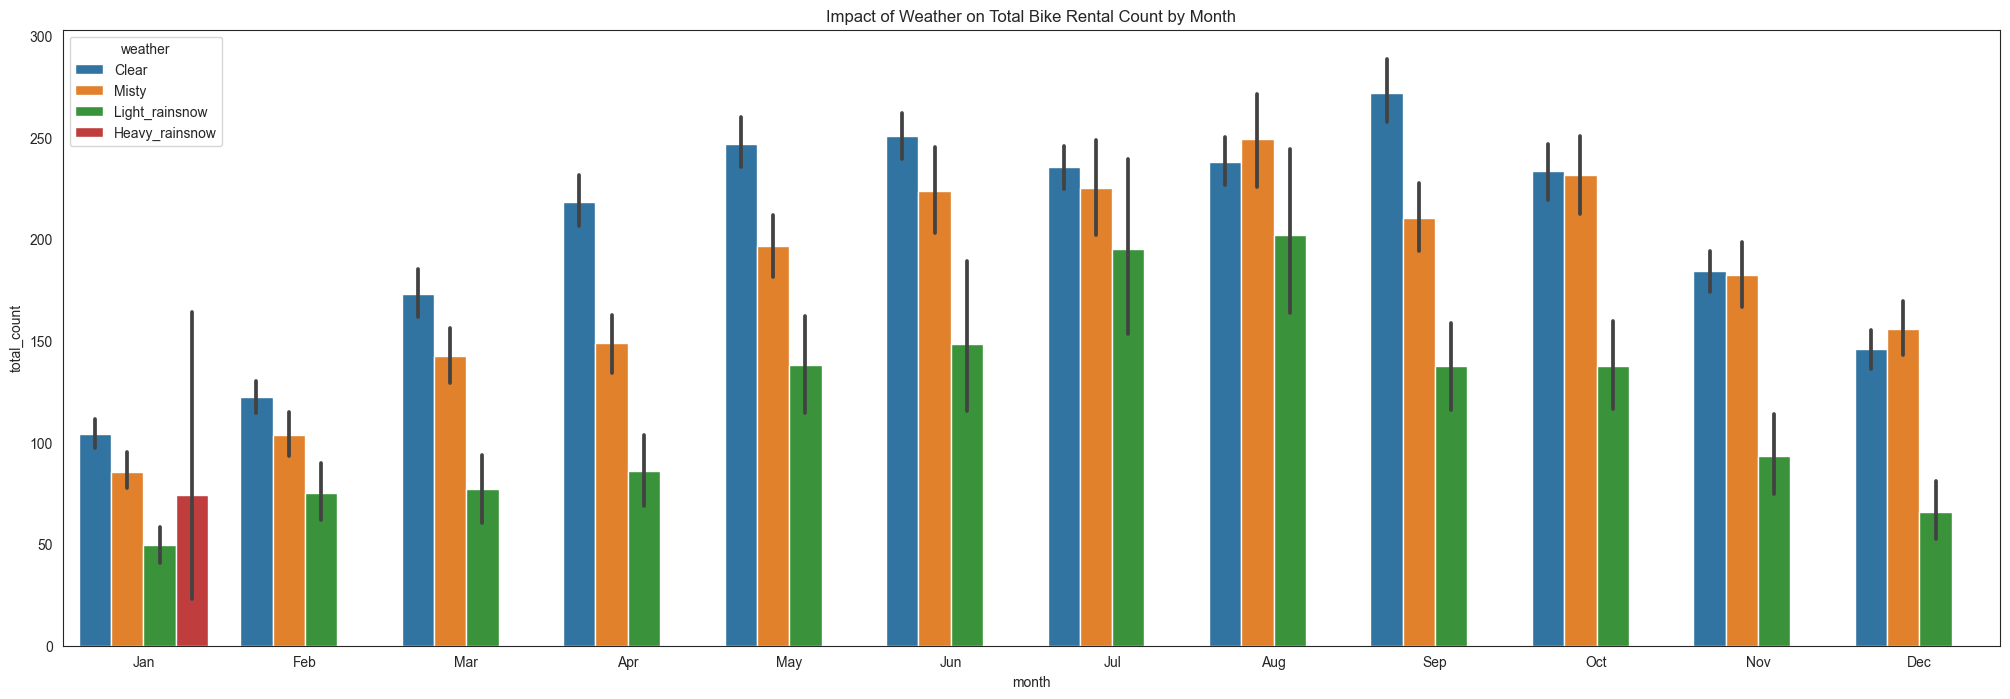

In [21]:
fig,ax=plt.subplots(figsize=(25,8))
sns.set_style('white')
sns.barplot(x='month',y='total_count',data=hour[['month','total_count','weather']],hue='weather',ax=ax)
ax.set_title('Impact of Weather on Total Bike Rental Count by Month')

Berdasarkan gambar diatas dapat dilihat bahwa cuaca berpengaruh terhadap jumlah peminjaman tiap bulannya. Pada setiap bulan cuaca cerah(CLEAR) dan Berawan(MISTY) menjadi cuaca dengan total peminjaman tertinggi, terutama pada bulan September.

## RFM Analysis

In [22]:

# Calculate the recency (R) for each customer
hour['datetime'] = pd.to_datetime(hour['datetime'])
max_datetime = hour['datetime'].max().to_pydatetime().date()  # Convert max_datetime to datetime object
hour['recency'] = hour['datetime'].apply(lambda x: (max_datetime - x.date()).days)

# Calculate the frequency (F) for each customer
hour['frequency'] = hour['registered'] + hour['casual']

# Calculate the monetary value (M) for each customer
hour['monetary'] = hour['total_count']

# Select the relevant columns for the RFM analysis
rfm_data = hour[['recency', 'frequency', 'monetary', 'weekday']]

rfm_data.head(20)



,recency,frequency,monetary,weekday
0,730,16,16,Saturday
1,730,40,40,Saturday
2,730,32,32,Saturday
3,730,13,13,Saturday
4,730,1,1,Saturday
5,730,1,1,Saturday
6,730,2,2,Saturday
7,730,3,3,Saturday
8,730,8,8,Saturday
9,730,14,14,Saturday


### Pertanyaan 4 :
Pada hari apa terakhir kali transaksi paling baru  terjadi?

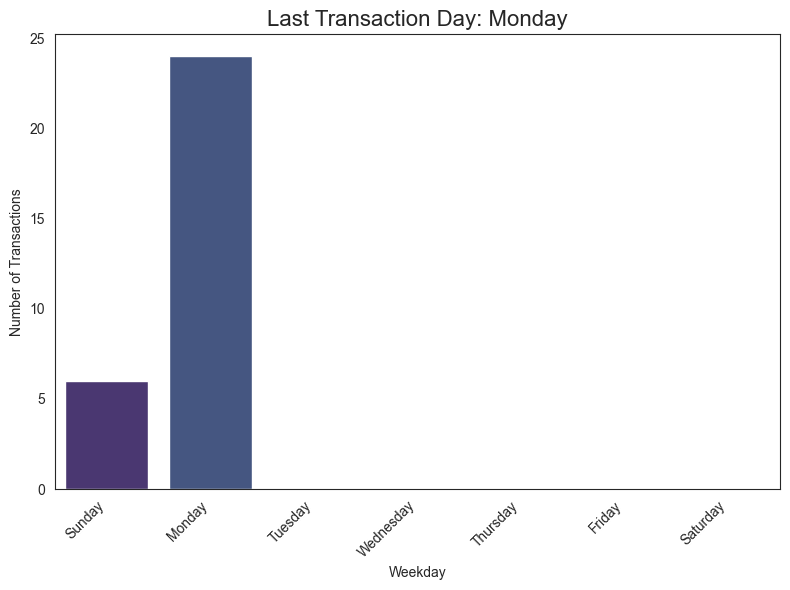

In [23]:
# Take the data with the lowest recency value (last transaction)
last_transaction_day = rfm_data[rfm_data['recency'] == rfm_data['recency'].min()]['weekday'].values[0]

# Create bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='weekday', data=rfm_data.sort_values(by="recency", ascending=True).head(30), palette='viridis')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.title(f"Last Transaction Day: {last_transaction_day}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dari gambar tersebut dapat di simpulkan bahwa hari terakhir terjadinya transaksi adalah hari Senin(Monday)

### Pertanyaan 5:
Pada hari apa transaksi paling sering terjadi?

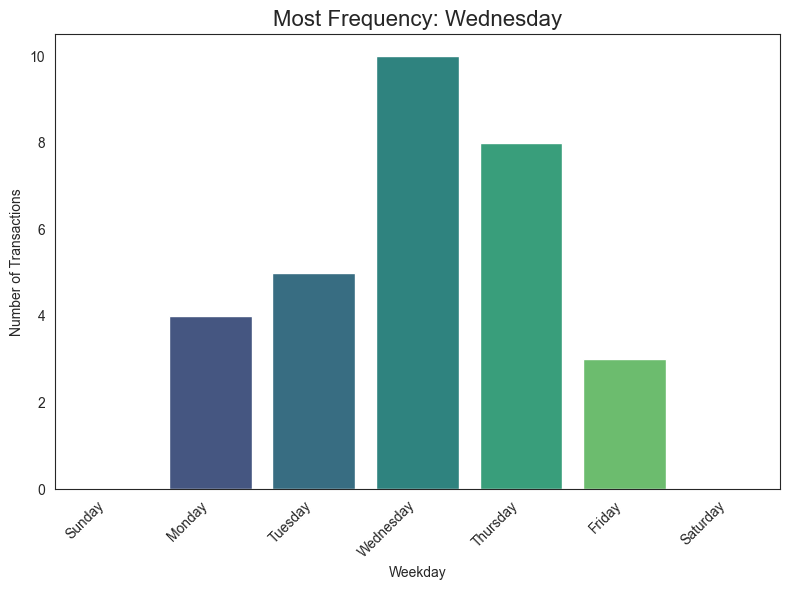

In [24]:
# Take the data with the highest frequency value
freq_transaction_day = rfm_data[rfm_data['frequency'] == rfm_data['frequency'].max()]['weekday'].values[0]

# Create bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='weekday', data=rfm_data.sort_values(by="frequency", ascending=False).head(30), palette='viridis')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.title(f"Most Frequency: {freq_transaction_day}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dari gambar tersebut dapat dilihat bahwa hari Rabu(WEDNESDAY) adalah hari yang memiliki transaksi/ peminjaman yang terbanyak

### Pertanyaan 6:
Hari apa dalam seminggu yang memiliki total nilai transaksi tertinggi?

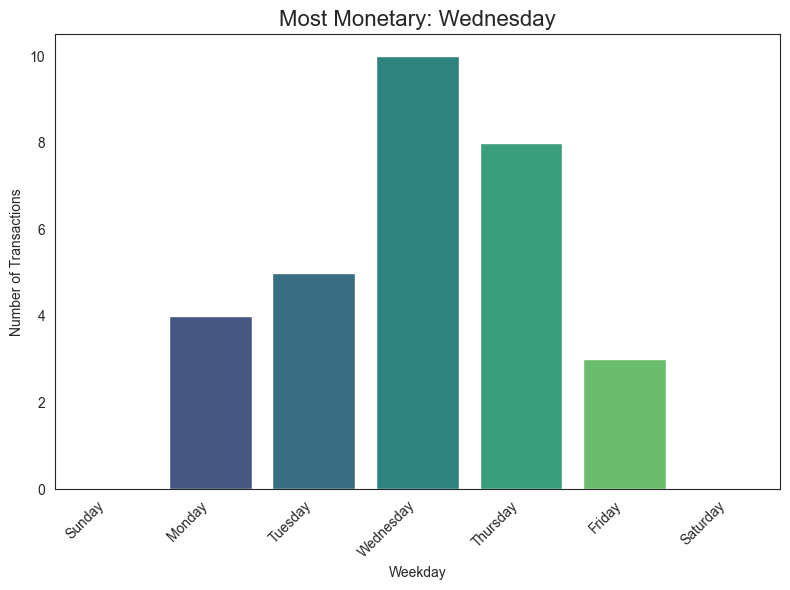

In [25]:
# Take the data with the highest Monetary value
monetary_transaction_day = rfm_data[rfm_data['monetary'] == rfm_data['monetary'].max()]['weekday'].values[0]

# Create bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='weekday', data=rfm_data.sort_values(by="monetary", ascending=False).head(30), palette='viridis')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.title(f"Most Monetary: {monetary_transaction_day}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dari gambar tersebut dapat diketahui bahwa hari Rabu (WEDNESDAY) adalah hari yang memiliki total transaksi tertinggi

## Conclusion

- Pada jam-jam apa dalam sehari yang memiliki tingkat peminjaman sepeda yang tinggi pada setiap musim? \
Conclusion: Jam 17.00 - 18.00 di musim

- Bagaimana perbedaan dalam pola rental sepeda antara tahun 2011 dan 2012?\
Conclusion: Tahun 2012 mengalami peningkatan dari tahun 2011, terutama pada bulan agustus dan september

- Bagaimana pengaruh cuaca terhadap jumlah total rental sepeda pada setiap bulannya?\
Conclusion: Cuaca berpengaruh pada tiap bulannya, dengan Cuaca Cerah dan Cuaca berawan merupakan Cuaca dengan total rental tertinggi

- Pada hari apa terakhir kali transaksi paling baru  terjadi?\
Conclusion: Senin(MONDAY)

- Pada hari apa transaksi paling sering terjadi?\
Conclusion: Rabu (WEDNESDAY)

- Hari apa dalam seminggu yang memiliki total nilai transaksi tertinggi?\
Conclusion: Rabu (WEDNESDAY)

